<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NumPy-回顾" data-toc-modified-id="NumPy-回顾-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NumPy 回顾</a></span></li><li><span><a href="#kNN-算法" data-toc-modified-id="kNN-算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>kNN 算法</a></span><ul class="toc-item"><li><span><a href="#准备：自建数据集" data-toc-modified-id="准备：自建数据集-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>准备：自建数据集</a></span></li><li><span><a href="#实施-kNN-算法" data-toc-modified-id="实施-kNN-算法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>实施 kNN 算法</a></span></li><li><span><a href="#准备数据---读取解析" data-toc-modified-id="准备数据---读取解析-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>准备数据 - 读取解析</a></span></li><li><span><a href="#分析数据" data-toc-modified-id="分析数据-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>分析数据</a></span></li><li><span><a href="#准备数据---归一化" data-toc-modified-id="准备数据---归一化-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>准备数据 - 归一化</a></span></li><li><span><a href="#测试算法" data-toc-modified-id="测试算法-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>测试算法</a></span></li><li><span><a href="#使用算法" data-toc-modified-id="使用算法-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>使用算法</a></span></li></ul></li></ul></div>

# NumPy 回顾
- 和MATLAB不同，* 是元素逐个相乘，而不是矩阵乘法。在 Numpy 中使用dot来进行矩阵乘法

In [4]:
import numpy as np

In [12]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([9, 10])
w = np.array([11, 12])

In [16]:
# 每个元素单独相乘
x * y

array([[ 5, 12],
       [21, 32]])

In [18]:
# 矩阵乘法
x.dot(y)

array([[19, 22],
       [43, 50]])

In [19]:
np.dot(x, y)

array([[19, 22],
       [43, 50]])

In [20]:
np.dot(x, v)

array([29, 67])

In [21]:
np.dot(v, x)

array([39, 58])

In [22]:
np.dot(v, w)

219

In [23]:
w.dot(v)

219

In [29]:
np.array([1.2, 2, 3]).dtype


dtype('float64')

In [37]:
a = np.eye(4)
print(a)
print(np.linalg.inv(a))


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# kNN 算法

## 准备：自建数据集

In [57]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import operator

In [91]:
# 自建简单数据集
def createDataSet():
    groups = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return groups, labels

In [92]:
# 输出检验数据是否定义正确
groups, labels = createDataSet()
print(groups, labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]] ['A', 'A', 'B', 'B']


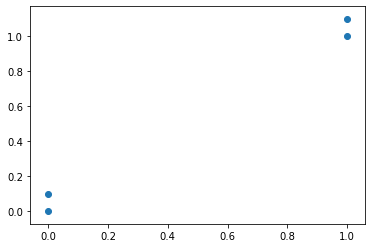

In [108]:
# 数据可视化
x = groups[:, 0]
y = groups[:, 1]

plt.scatter(x, y)
plt.show()

## 实施 kNN 算法

In [144]:
## 导入库
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import operator

# 处理中文和负号
matplotlib.rcParams['font.family'] = 'SimHei' # 'SimHei'是黑体
matplotlib.rcParams['font.style'] = 'italic' # 斜体
matplotlib.rcParams['font.size'] = '11'
matplotlib.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [110]:
## kNN 算法实现 
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    diffMat = inX - dataSet
    sqrDiffMat = diffMat ** 2
    sqrDistances = sqrDiffMat.sum(axis=1)
    distances = sqrDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] =  classCount.get(voteLabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [111]:
# 用自建数据集检验算法正确性
classify0([10,10], groups, labels, 3)

'A'

## 准备数据 - 读取解析

In [112]:
## 从文本中解析训练样本矩阵和标签
def file2array(filename):
    file = open(filename, 'r')
    fileLines = file.readlines()
    numberOfLines = len(fileLines)
    dataArray = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in fileLines:
        line = line.strip() # 参数为空时，默认删除开头、结尾处空白符（包括'\n', '\r', '\t', ' ')
        listFromLine = line.split('\t')
        dataArray[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return dataArray, classLabelVector

In [114]:
# 检查数据是否解析正常
data, labels = file2array('F:\Project\Machine-Learning\Machine Learning in Action\PyCharm实现\datingTestSet2.txt')
print(data)
print(labels[0:20])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


## 分析数据

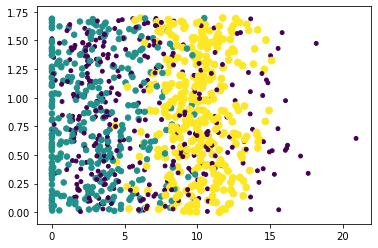

In [116]:
# 分析数据1
plt.scatter(data[:, 1], data[:, 2], s=15.0*np.array(labels),
                c=150.0*np.array(labels))
plt.show()

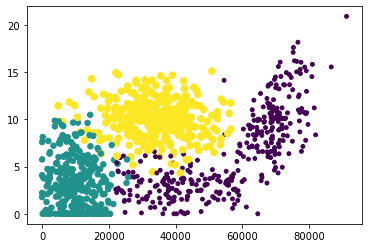

In [117]:
# 分析数据2
plt.scatter(data[:, 0], data[:, 1], s=15.0*np.array(labels),
                c=150.0*np.array(labels))
plt.show()

In [128]:
 # 添加 legend ,思路是把三种不同标签的图分开，分成三个子图，画在一张图里面
def scatterLengend(data, labels, x, y):
    type1 = []
    type2 = []
    type3 = []
    for i in range(len(labels)):
        if labels[i] == 1:
            type1.append(np.array(data[i]))
        elif labels[i] == 2:
            type2.append(np.array(data[i]))
        else:
            type3.append(np.array(data[i]))
    type1 = np.array(type1)
    type2 = np.array(type2)
    type3 = np.array(type3)
    g1 = plt.scatter(type1[:, x], type1[:, y], c='red')
    g2 = plt.scatter(type2[:, x], type2[:, y], c='yellow')
    g3 = plt.scatter(type3[:, x], type3[:, y], c='blue')
    plt.legend(handles=[g1, g2, g3], labels=['不喜欢', '魅力一般', '极具魅力'])
    plt.show()

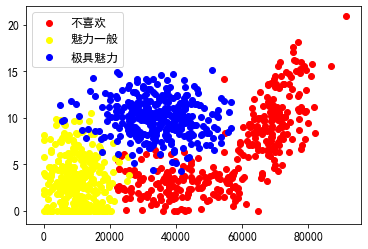

In [129]:
scatterLengend(data, labels, 0, 1)

## 准备数据 - 归一化

In [135]:
data = np.arange(15).reshape(5, 3)
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [139]:
data.max(0)

array([12, 13, 14])

In [163]:
## 归一化数据
def autoNorm(dataSet):
    minVal = dataSet.min(0)
    maxVal = dataSet.max(0)
    ranges = maxVal - minVal
    normDataSet = np.zeros(np.shape(dataSet))
    normDataSet = (dataSet - minVal) / ranges
    return normDataSet, ranges, minVal

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]


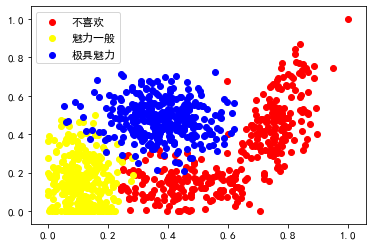

In [164]:
data, labels = file2array('F:\Project\Machine-Learning\Machine Learning in Action\PyCharm实现\datingTestSet2.txt')

normDataSet, ranges, minVal = autoNorm(data)
print(normDataSet)

scatterLengend(normDataSet, labels, 0, 1)

## 测试算法

In [165]:
# 测试算法
def algTest():
    testRatio = 0.1
    dataSet, labels = file2array('F:\Project\Machine-Learning\Machine Learning in Action\PyCharm实现\datingTestSet2.txt')
    normDataSet, ranges, minVal = autoNorm(dataSet)
    numDataSet = normDataSet.shape[0]
    numTestSet = int(numDataSet * testRatio)
    errorCount = 0
    for i in range(numTestSet):
        classifyResult = classify0(normDataSet[i,:], normDataSet[numTestSet:numDataSet,:],\
                                   labels[numTestSet:numDataSet],7)
        #print('the classifier result: %d, the real answer is: %d'\
        #     %(classifyResult, labels[i]))
        if(classifyResult != labels[i]):
            errorCount += 1
    print('the total error rate is: %f' % (errorCount / float(numTestSet)))

In [166]:
algTest()

the total error rate is: 0.040000


## 使用算法

In [169]:
# 使用算法
def classifyPerson():
    resultList = ['不喜欢', '魅力一般', '极具魅力']
    percentTats = float(input('percentage of time spent playing video games?'))
    ffMiles = float(input('frequent of filer miles earned per years?'))
    iceCream = float(input('liters of ice cream consumed per years?'))
    dataSet, labels = file2array('F:\Project\Machine-Learning\Machine Learning in Action\PyCharm实现\datingTestSet2.txt')
    normDataSet, ranges, minVal = autoNorm(dataSet)
    inArr = [ffMiles, percentTats, iceCream]
    classifyResult = classify0((inArr - minVal) / ranges, normDataSet, labels, 7)
    print('你可能对这个人的评价是：%s' % resultList[classifyResult - 1])

In [170]:
classifyPerson()

percentage of time spent playing video games?10
frequent of filer miles earned per years?10000
liters of ice cream consumed per years?0.5
你可能对这个人的评价是：魅力一般
